 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [12]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [6]:
# Reading whale returns
whale_df = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates=True)

In [7]:
# Count nulls
null_counts = whale_df.isnull().sum()

In [91]:
# Drop nulls
whale_df = whale_df.dropna()

# Display the resulting DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [14]:
# Reading algorithmic returns
algo_df = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates=True)

In [15]:
# Count nulls
null_counts = algo_df.isnull().sum()

In [92]:
# Drop nulls
algo_df = algo_df.dropna()

# Display the resulting DataFrame
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [32]:
# Reading S&P TSX 60 Closing Prices
tsx_df = pd.read_csv("sp_tsx_history.csv", index_col="Date", parse_dates=True)

In [84]:
# Check Data Types
tsx_df.dtypes

S&P TSX Returns    float64
dtype: object

In [85]:
# Remove non-numeric values and convert data types
tsx_df = tsx_df.replace("[\$,]", "", regex=True).astype(float)

In [86]:
# Calculate Daily Returns
daily_returns = tsx_df.pct_change()

In [87]:
# Drop nulls
daily_returns = daily_returns.dropna()

In [93]:
# Rename `Close` Column to be specific to this portfolio.
tsx_df = tsx_df.rename(columns={"Close": "S&P TSX Returns"})

# Display the resulting DataFrame
tsx_df.head()

,S&P TSX Returns
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [94]:
# Convert the S&P TSX 60 closing prices to daily returns. Calculate daily returns
daily_returns = tsx_df["S&P TSX Returns"].pct_change()

# Drop the first row of data
daily_returns.dropna(inplace=True)

# Display the resulting DataFrame
daily_returns.head()

Date
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
2012-10-09   -0.011709
Name: S&P TSX Returns, dtype: float64

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [97]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis="columns")

#Removing null
combined_df.dropna(inplace=True)

# Display the resulting DataFrame
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: title={'center': 'Daily Returns of All Portfolios'}, xlabel='Date'>

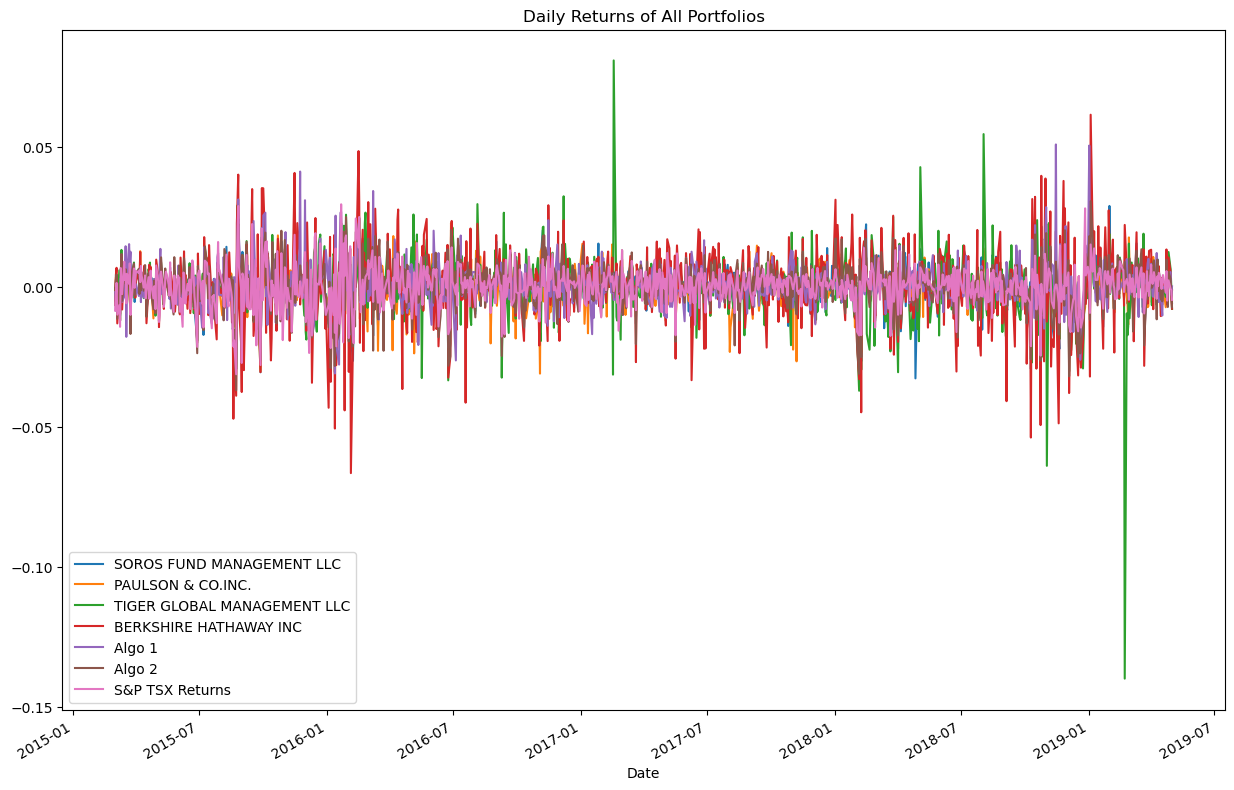

In [79]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15, 10), title="Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot: title={'center': 'Cumulative Returns of All Portfolios'}, xlabel='Date'>

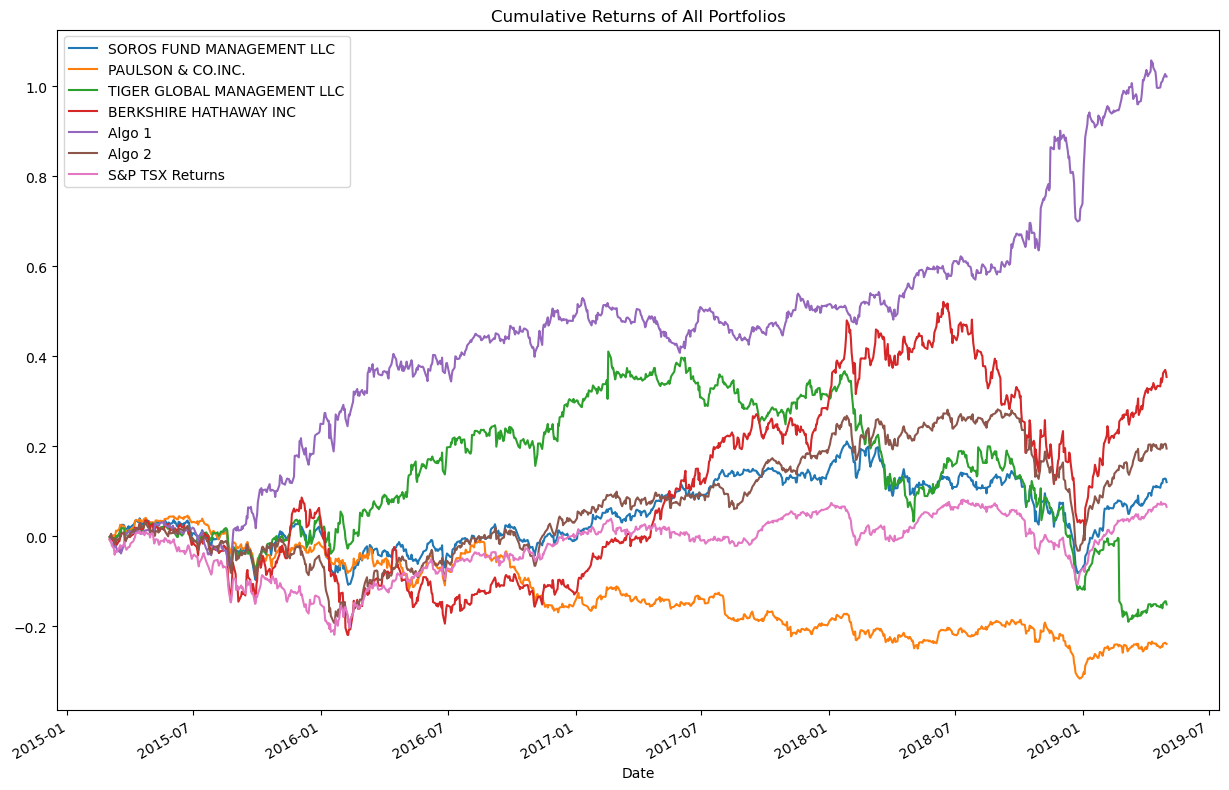

In [80]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(15, 10), title="Cumulative Returns of All Portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot: >

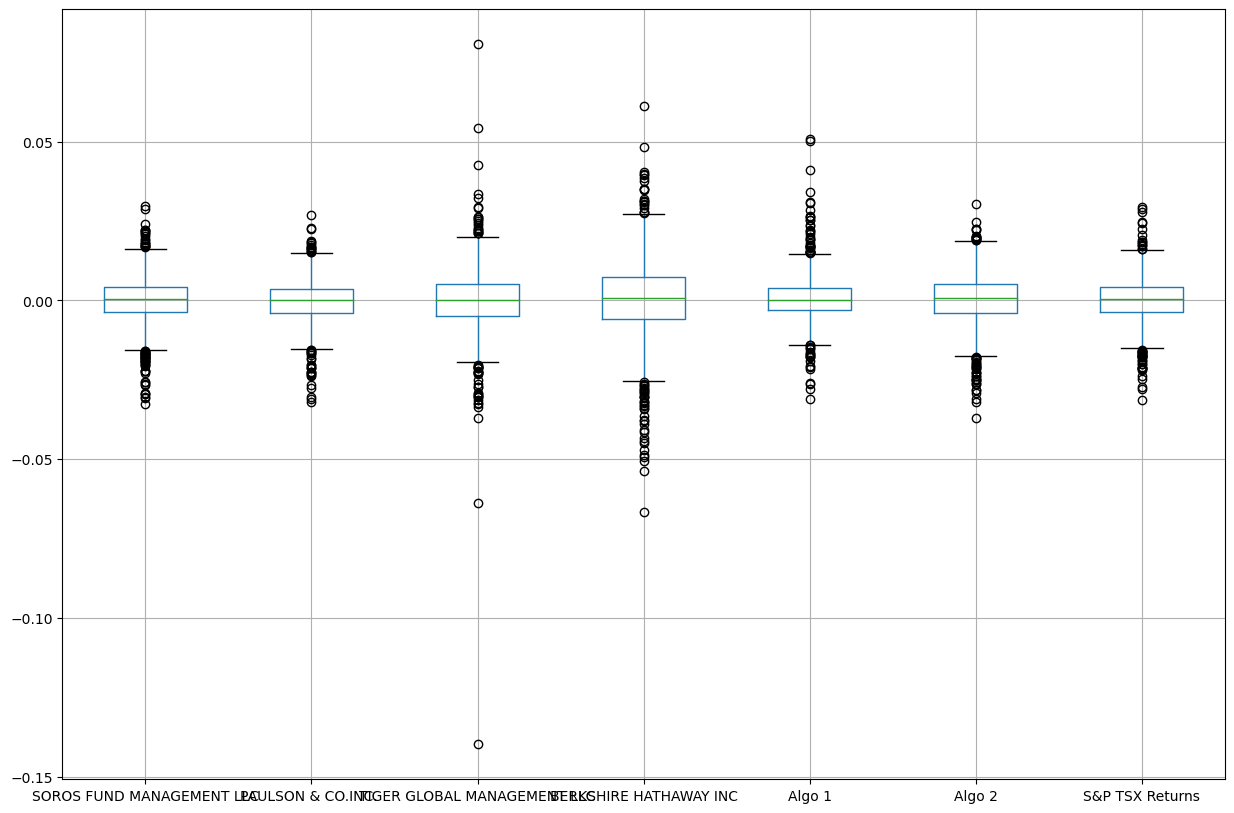

In [122]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(15, 10))


### Calculate Standard Deviations

In [112]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()

# Display the resulting DataFrame
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX Returns                0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [118]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_daily_std = tsx_df.std()

# Display the daily standard deviation of S&P TSX 60
print(tsx_daily_std)

# Determine which portfolios are riskier than the S&P TSX 60


S&P TSX Returns    1328.337613
dtype: float64


### Calculate the Annualized Standard Deviation

In [114]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)

# Display the resulting DataFrame
print(annualized_std)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX Returns                0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: title={'center': 'Rolling Standard Deviation for All Portfolios (21-day window)'}, xlabel='Date'>

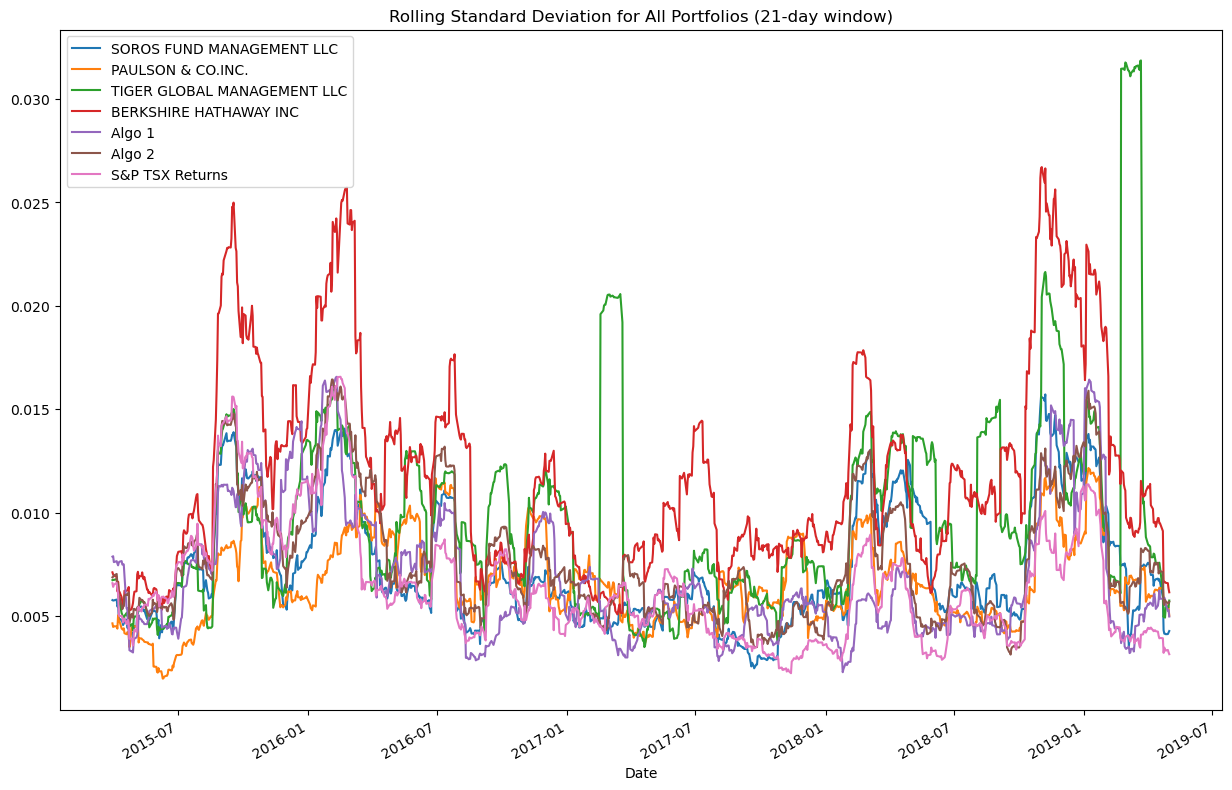

In [120]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15, 10), title="Rolling Standard Deviation for All Portfolios (21-day window)")

### Calculate and plot the correlation

In [125]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [154]:
# Calculate covariance of a single portfolio
whale_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=90).cov

# Calculate variance of S&P TSX
tsx_variance = combined_df['S&P TSX Returns'].rolling(window=90).var

# Computing beta
beta = whale_covariance / tsx_variance

# Plot beta trend
beta.plot(figsize=(15, 10))


TypeError: unsupported operand type(s) for /: 'method' and 'method'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot: title={'center': 'Exponentially Weighted Moving Average (21-day half-life) of Standard Deviation'}, xlabel='Date'>

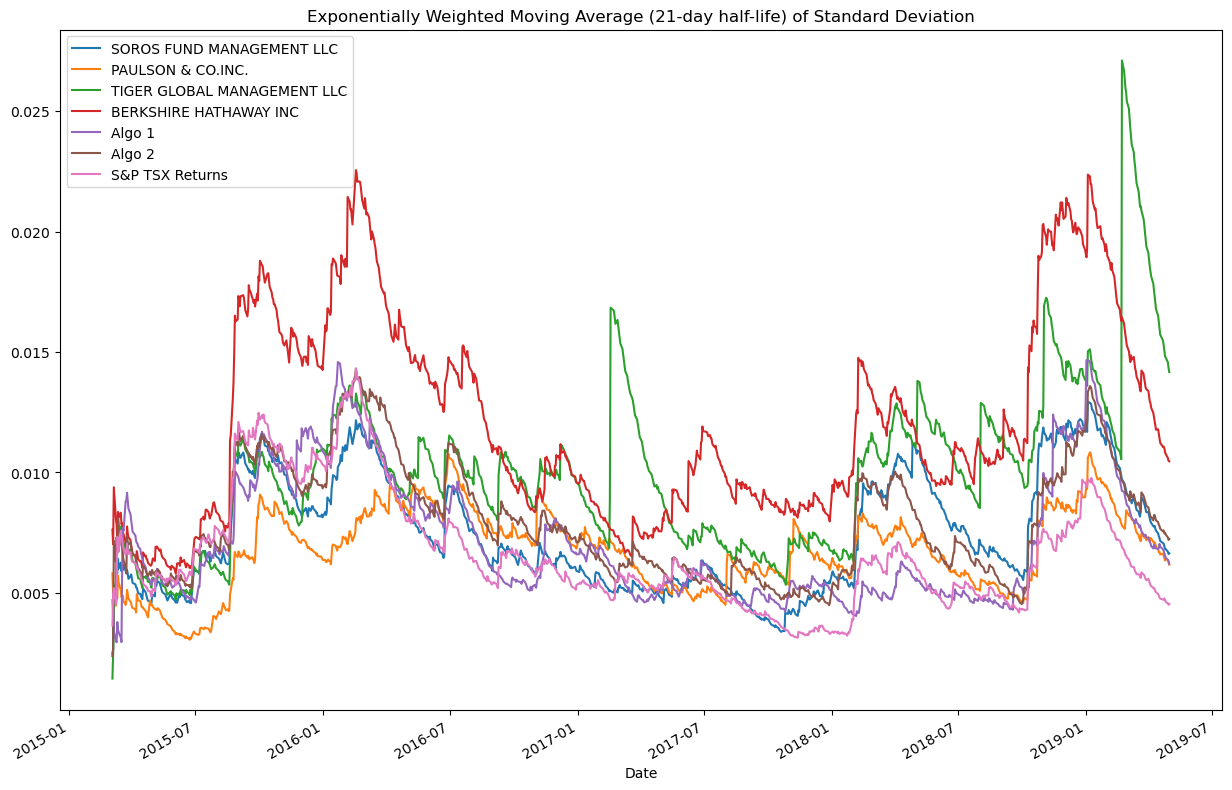

In [155]:
# Use `ewm` to calculate the rolling window
ewma_df = combined_df.ewm(halflife=21).std()

# Plot the EWMA with 21-day half-life for each portfolio
ewma_df.plot(figsize=(15, 10), title="Exponentially Weighted Moving Average (21-day half-life) of Standard Deviation")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [157]:
# Annualized Sharpe Ratios.
returns = combined_df.pct_change()


In [156]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!